In [1]:
import datajoint as dj

In [2]:
dj.config['database.host'] = '127.0.0.1'
dj.config['database.user'] = 'root'
dj.config['database.password'] = 'simple'

In [23]:
dj.config.save_local()

In [3]:
schema = dj.Schema('university')

[2023-08-29 19:01:01,193][INFO]: Connecting root@127.0.0.1:3306
[2023-08-29 19:01:01,648][INFO]: Connected root@127.0.0.1:3306


In [4]:
@schema
class Person(dj.Manual):
    definition = """
    person : int
    ---
    first_name : varchar(30)
    last_name : varchar(30)
    date_of_birth : date
    """

In [5]:
Person.drop()

`university`.`person` (1 tuples)
Proceed? [yes, No]: no


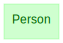

In [6]:
dj.Diagram(schema)

In [7]:
Person()

person,first_name,last_name,date_of_birth
1,Jane,Smith,2022-02-02


In [9]:
Person.insert1((1, "Jane", "Smith", "2022-02-02"), skip_duplicates=True)

In [ ]:
Person()

In [14]:
from faker import Faker
faker = Faker()
from tqdm import tqdm 

In [15]:
Person.insert((i, faker.first_name(), faker.last_name(), faker.date_of_birth()) for i in tqdm(range(1000,2000)))

100%|██████████████████████████████████████| 1000/1000 [00:00<00:00, 5399.02it/s]


In [16]:
Person()

person,first_name,last_name,date_of_birth
1,Jane,Smith,2022-02-02
1000,Robert,Smith,1947-11-18
1001,Dan,Warren,2019-08-07
1002,Melissa,Jackson,2003-12-26
1003,Brad,Buck,1984-12-18
1004,Joseph,Maxwell,1947-09-09
1005,Jonathan,Taylor,1943-12-10
1006,Carrie,Richards,1908-05-29
1007,Olivia,Coleman,1941-02-17
1008,Elizabeth,Pena,1981-08-18


In [22]:
Person.fetch(format="frame")

,first_name,last_name,date_of_birth
person,,,
1,Jane,Smith,2022-02-02
1000,Robert,Smith,1947-11-18
1001,Dan,Warren,2019-08-07
1002,Melissa,Jackson,2003-12-26
1003,Brad,Buck,1984-12-18
...,...,...,...
1995,Diana,Mclean,1947-04-27
1996,Christopher,Waters,1965-10-30
1997,Samantha,Rodriguez,2007-02-16
